# Assignment 1: Dino Fun World

### Assignment Description

You, in your role as a data explorer and visualizer, have been asked by the administrators of a small amusement park in your hometown to answer a few questions about their park operations. The dataset that they provided for you to perform the requested analysis includes the movement and communication data captured from the park attendees' apps during one weekend (Friday, Saturday, and Sunday).

The administrators would like you to answer four relatively simple questions about the park activities on the day in question. These questions all deal with park operations and can be answered using the data provided.

Question 1: What is the most popular attraction to visit in the park?

Question 2: What ride (note that not all attractions are rides) has the longest average visit time?

Question 3: Which Fast Food offering has the fewest visitors?

Question 4: Compute the Skyline of number of visits and visit time for the park's ride, and report the rides that appear in the Skyline. (Note: Your answer should be three points, which can be given in any order.)


### Directions

The database provided by the park administration is formatted to be readable by any SQL database library. The course staff recommends the sqlite3 library. The database contains three tables, named 'checkin', 'attractions', and 'sequences'. The database file is named 'dinofunworld.db' and is available in the read only directory of the Jupyter Notebook environment (i.e., readonly/dinofunworld.db). It can also be accessed by selecting File > Open > dinofunworld.db.

The information contained in each of these tables is listed below:

`checkin`:
    - The check-in data for all visitors for the day in the park. The data includes two types of check-ins: inferred and actual checkins.
    - Fields: visitorID, timestamp, attraction, duration, type
`attraction`:
    - The attractions in the park by their corresponding AttractionID, Name, Region, Category, and type. Regions are from the VAST Challenge map such as Coaster Alley, Tundra Land, etc. Categories include Thrill rides, Kiddie Rides, etc. Type is broken into Outdoor Coaster, Other Ride, Carousel, etc.
    - Fields: AttractionID, Name, Region, Category, type
`sequences`:
    - The check-in sequences of visitors. These sequences list the position of each visitor to the park every five minutes. If the visitor has not entered the part yet, the sequence has a value of 0 for that time interval. If the visitor is in the park, the sequence lists the attraction they have most recently checked in to until they check in to a new one or leave the park.
    - Fields: visitorID, sequence
    
Using the provided data, answer the four questions that the administrators have asked.

### Submission Directions for Assignment Deliverables

This assignment will be auto-graded. We recommend that you use Jupyter Notebook in your browser to complete and submit this assignment. In order for your answers to be correctly registered in the system, you must place the code for your answers in the cell indicated for each question. In addition, you should submit the assignment with the output of the code in the cell's display area. The display area should contain only your answer to the question with no extraneous information, or else the answer may not be picked up correctly. 

Each cell that is going to be graded has a set of comment lines at the beginning of the cell. These lines are extremely important and must not be modified or removed. (Graded Cell and PartID comments must be in the same line for proper execution of code.)

Please execute each cell in Jupyter Notebook before submitting.

If you choose to download the file and work on your assignment locally, you can also upload your file to each part in the programming assignment submission space. The file you submit should be named "Assignment_1.ipynb".

### Evaluation

There are four parts in the grading, and each part has one test case where the total number of points for all parts is 4. If some part of your data is incorrect, you will get a partial score of 0.25 or 0.50. If the submission fails, we will return the corresponding error messages. If the submission is correct, you will see "Correct" with 1.0 point for each part.

In [91]:
import sqlite3
import matplotlib
from functools import reduce
db_filename = 'dinofunworld.db'
conn = sqlite3.connect(db_filename) 
c = conn.cursor()

In [92]:
# Graded Cell, PartID: NDnou
# Question 1: What is the most popular attraction to visit in the park?
# Notes: Your output should be the name of the attraction.
c.execute ("SELECT attraction FROM checkin group by attraction ORDER BY count(*) DESC  LIMIT 1")
attractionId = c.fetchall()[0][0]
c.execute ("SELECT Name FROM attraction WHERE AttractionID = '{0}'".format(attractionId))
print(c.fetchall()[0][0])

Atmosfear


In [93]:
def get_sec(time_str):
    return (sum(int(actualSplitValue)* 60 ** iterationValue for iterationValue, actualSplitValue in enumerate(reversed(time_str.split(":")))))

In [94]:
# Graded Cell, PartID: FXGHp
# Question 2: What ride (note that not all attractions are rides) has the longest average visit time?
# Notes: Your output should be the name of the ride.
d = conn.cursor()
d.row_factory = lambda cursor, row: row[0]
d.execute("SELECT DISTINCT(attraction) FROM checkin WHERE attraction IN (SELECT AttractionID from attraction WHERE Category like '%Ride%') ORDER BY attraction")
allAttractions = d.fetchall()
attractionTimingsDict = {}
for eachAttraction in allAttractions:
    allTimingsForAnAttraction = d.execute("SELECT COUNT(visitorID) FROM checkin WHERE attraction = '{0}'".format(eachAttraction)).fetchall()
    convertedAllTimingsForAnAttraction = map(lambda x: get_sec(x), allTimingsForAnAttraction)
    summedTimingsForAnAttraction = reduce(lambda a,b: a+b, convertedAllTimingsForAnAttraction)
    attractionTimingsDict.update([(eachAttraction, summedTimingsForAnAttraction/len(allTimingsForAnAttraction))])
sortedAttractionTimings = sorted(attractionTimingsDict.items(), key=lambda x: x[1], reverse=True)
d.execute ("SELECT Name FROM attraction WHERE AttractionID = '{0}'".format(sortedAttractionTimings[1][0]))
print(d.fetchall()[0])

Flight of the Swingodon


In [95]:
# Graded Cell, PartID: KALua
# Question 3: Which Fast Food offering in the park has the fewest visitors?
# Notes: Your output should be the name of the fast food offering.
d.execute("SELECT DISTINCT(attraction) FROM checkin WHERE attraction IN (SELECT AttractionID from attraction WHERE Category like '%Food%') ORDER BY attraction")
allFoodAttractions = d.fetchall()
foodAttractionTimingsDict = {}
for eachAttraction in allAttractions:
    allVisitorsForFoodAttraction = d.execute("SELECT COUNT(DISTINCT(visitorID)) FROM checkin WHERE attraction = '{0}'".format(eachAttraction)).fetchall()
    foodAttractionTimingsDict.update([(eachAttraction, allVisitorsForFoodAttraction)])
sortedAttractionTimings = sorted(foodAttractionTimingsDict.items(), key=lambda x: x[1])
d.execute ("SELECT Name FROM attraction WHERE AttractionID = '{0}'".format(sortedAttractionTimings[0][0]))
print(d.fetchall()[0])

Flying TyrAndrienkos


In [105]:
import pandas as pd

def count_diffs(a, b, min_criteria, max_criteria):
    worseCriteriaCount = 0
    bestCriteriaCount = 0
    
    # in case where you are looking for minimum criteria let's say distance/price, it is best if a<b.
    for f in min_criteria:
        bestCriteriaCount += a[f] < b[f]
        worseCriteriaCount += a[f] > b[f]
    
    # in case where you are looking for maximum criteria let's say number of visitors visiting a ride, it is best if a>b.
    for f in max_criteria:
        bestCriteriaCount += a[f] > b[f]
        worseCriteriaCount += a[f] < b[f]
        
    return bestCriteriaCount, worseCriteriaCount

In [106]:
def find_skyline_using_bnlAlgorithm(df, min_criteria, max_criteria):
    """ Finds skyline using Block nested loops algorithm """
    rows = df.to_dict(orient='index')
    # Standard format of rows in rows variable will be
    # {0: {'visitors': 18700, 'timings': 4.9946796222717245}, 1: {'visitors': 18717, 'timings': 3.6079002081859963}}
    
    # Use the first row to initialize the skyline
    skyline = {df.index[0]}
    
    for i in df.index[1:]:
        to_drop = set()
        is_dominated = False
        
        for j in skyline:
            betterValue, worseValue = count_diffs(rows[i], rows[j], min_criteria, max_criteria)
            
            if worseValue > 0 and betterValue == 0:
                is_dominated = True
                break
                
            if betterValue > 0 and worseValue == 0: 
                to_drop.add(j)

        if is_dominated:
            continue
            
        skyline = skyline.difference(to_drop)
        skyline.add(i)
    return pd.Series(df.index.isin(skyline), index=df.index)

1      True
2      True
3     False
4     False
5     False
6      True
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29     True
30    False
31    False
81    False
dtype: bool
[18700, 18717, 18694, 14415, 15577, 18792, 16024, 27747, 3597, 3759, 4062, 3640, 3747, 3963, 3747, 3925, 3922, 4022, 3877, 5240, 5552, 5271, 4935, 5349, 5549, 5669, 5042, 5082, 5608, 25074, 5608, 16093]
[269.4764705882353, 288.3975523728089, 856.5660104846474, 2800.744915665996, 2396.0994798021966, 385.8590664750652, 2344.322284644195, 676.0011172378996, 1883.4325842696628, 702.9249800478851, 687.4773510585918, 584.4076923076923, 362.2017614091273, 521.0100933636135, 357.7950863930885, 339.2163057324841, 338.76746557878636, 375.15340626553956, 355.0430745421718, 1833.7862464183381, 880.74333573487

Text(0.5, 1.0, 'Visitors and timings')

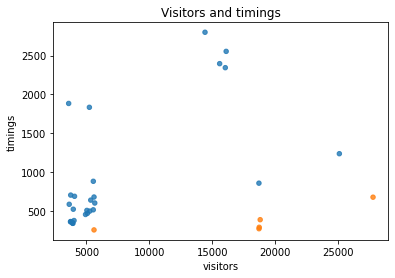

In [126]:
# Graded Cell, PartID: B0LUP
# Question 4: Compute the Skyline of number of visits and visit time for the park's ride and 
#  report the rides that appear in the Skyline. 
# Notes: Remember that in this case, higher visits is better and lower visit times are better. 
#  Your output should be formatted as an array listing the names of the rides in the Skyline.

e = conn.cursor()
e.row_factory = lambda cursor, row: row[0]
e.execute("SELECT DISTINCT(attraction) FROM checkin WHERE attraction IN (SELECT AttractionID from attraction WHERE Category like '%Ride%') ORDER BY attraction")
allRideAttractions = e.fetchall()
allRideAttractionTimingsDict = {}
allRideAttractionVisitorsDict = {}
for eachAttraction in allRideAttractions:
    allRideTimingsForAnAttraction = e.execute("SELECT duration FROM checkin WHERE attraction = '{0}' AND duration IS NOT NULL".format(eachAttraction)).fetchall()
    allVisitorsForRideAttraction = e.execute("SELECT COUNT(visitorID) FROM checkin WHERE attraction = '{0}'".format(eachAttraction)).fetchall()
    convertedAllRideTimingsForAnAttraction = map(lambda x: get_sec(x), allRideTimingsForAnAttraction)
    summedTimingsForARideAttraction = reduce(lambda a,b: ((a+b)), convertedAllRideTimingsForAnAttraction)
    allRideAttractionTimingsDict.update([(eachAttraction, summedTimingsForARideAttraction/len(allRideTimingsForAnAttraction))])
    allRideAttractionVisitorsDict.update([(eachAttraction, allVisitorsForRideAttraction)])
sortedRideAttractionTimings = sorted(allRideAttractionTimingsDict.items(), key=lambda x: x[0])
sortedRideAttractionVisitors = sorted(allRideAttractionVisitorsDict.items(), key=lambda x: x[0])
specificVisitors = list(map(lambda a : a[1][0], sortedRideAttractionVisitors))
specificTimings = list(map(lambda a : a[1], sortedRideAttractionTimings))
specificAttractions = list(map(lambda a : a[0], sortedRideAttractionTimings))
dataFrame = pd.DataFrame({
    'attractionIds': specificAttractions,
    'visitors': specificVisitors,
    'timings': specificTimings,
})
#print(specificAttractions)
#dataFrame.sample(10)
skyline = find_skyline_using_bnlAlgorithm(dataFrame, ["timings"], ["visitors"])
#print(type(skyline))
skyline.index = specificAttractions
print(skyline)
print(specificVisitors)
print(specificTimings)
skyLineList = []
count = 1
for indexValue, individualValue in skyline.items():
    if individualValue == True and count <= 3:
        print(e.execute("SELECT Name FROM attraction WHERE AttractionID = '{0}'".format(indexValue)).fetchall()[0])
        count += 1
    
colors = skyline.map({True: 'C1', False: 'C0'})
#print(type(colors))
#ax = houses.plot.scatter(x='size', y='price', c=colors, alpha=0.8)
#ax.set_title('Houses skyline')
dy = dataFrame.plot.scatter(x='visitors', y='timings', c=colors, alpha=0.8)
dy.set_title('Visitors and timings')

# d.execute ("SELECT Name FROM attraction WHERE AttractionID = '{0}'".format(sortedAttractionTimings[1][0]))
# print(d.fetchall()[0])